In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'D:\Data Science 6pm\Projects\Logistic Regression\IRIS DATASET _ ADVANCE VISUALIZATION _ EDA 2\Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Id is irrelevant attribute we have to drop it
df=df.drop('Id',axis=1)

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
# Counting the different features having in one Column
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
# To check missing values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df['Species']=df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [9]:
# Split Dataset in Independent Features and  Dependent Features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [10]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [12]:
X,y

(     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 0              5.1           3.5            1.4           0.2
 1              4.9           3.0            1.4           0.2
 2              4.7           3.2            1.3           0.2
 3              4.6           3.1            1.5           0.2
 4              5.0           3.6            1.4           0.2
 ..             ...           ...            ...           ...
 145            6.7           3.0            5.2           2.3
 146            6.3           2.5            5.0           1.9
 147            6.5           3.0            5.2           2.0
 148            6.2           3.4            5.4           2.3
 149            5.9           3.0            5.1           1.8
 
 [150 rows x 4 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 145    2
 146    2
 147    2
 148    2
 149    2
 Name: Species, Length: 150, dtype: int64)

In [13]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
# Postpruning
classifier = DecisionTreeClassifier(max_depth=2)

In [17]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'X[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

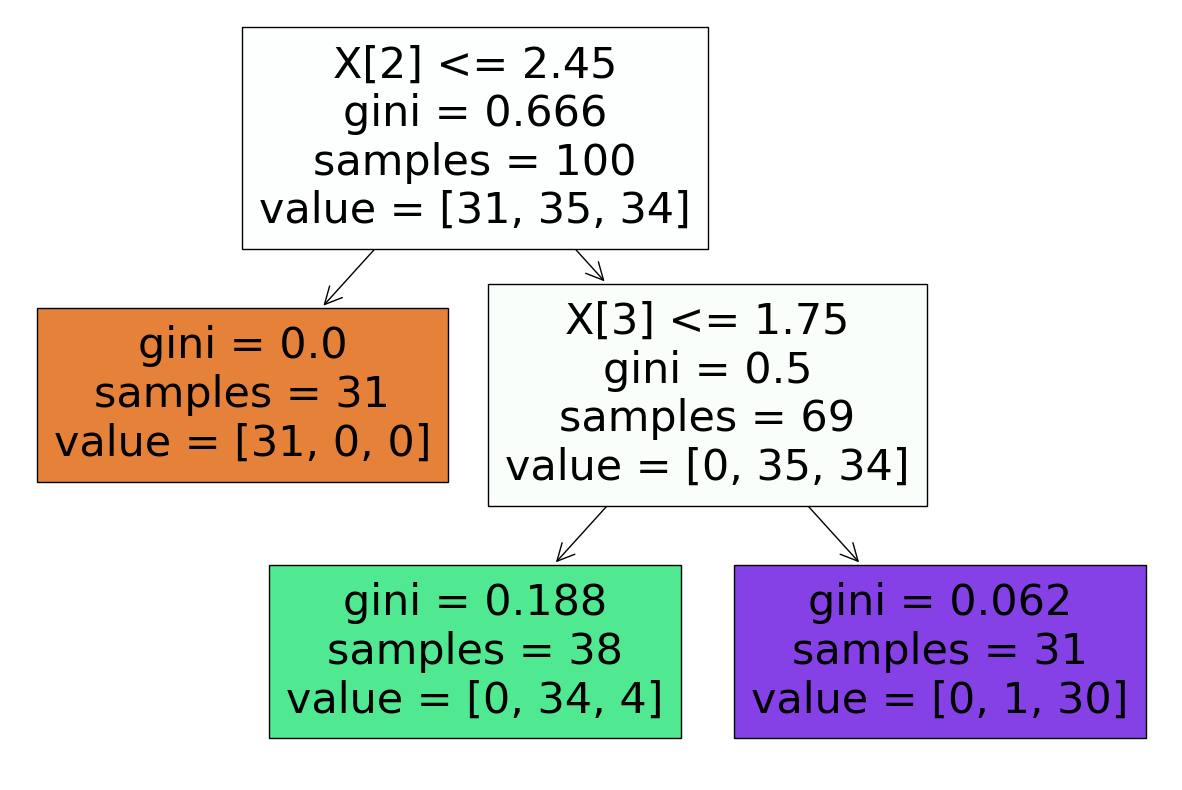

In [18]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [19]:
y_pred=classifier.predict(X_test)

In [20]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score, classification_report

In [22]:
score=accuracy_score(y_pred,y_test)
print(score)

0.98


In [23]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [24]:
# Preprunning
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
classifier = DecisionTreeClassifier()
cv=GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy')

In [27]:
cv.fit(X_train,y_train)

C:\Users\SAMEER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SAMEER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAMEER\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\SAMEER\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_fa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [28]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'splitter': 'random'}

In [29]:
y_pred=cv.predict(X_test)

In [30]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 0, 2, 2, 1, 1, 2, 1, 2,
       0, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score, classification_report

In [32]:
score=accuracy_score(y_pred,y_test)
print(score)

0.82


In [33]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.68      0.93      0.79        14
           1       0.80      0.67      0.73        18
           2       1.00      0.89      0.94        18

    accuracy                           0.82        50
   macro avg       0.83      0.83      0.82        50
weighted avg       0.84      0.82      0.82        50

